MAE: 6328.333333333333
RMSE: 7767.923479617008
R2: 0.9726828110328638

Feature Importance:
 recency_days       0.265836
avg_order_value    0.259801
frequency          0.243271
tenure_months      0.231092
dtype: float64


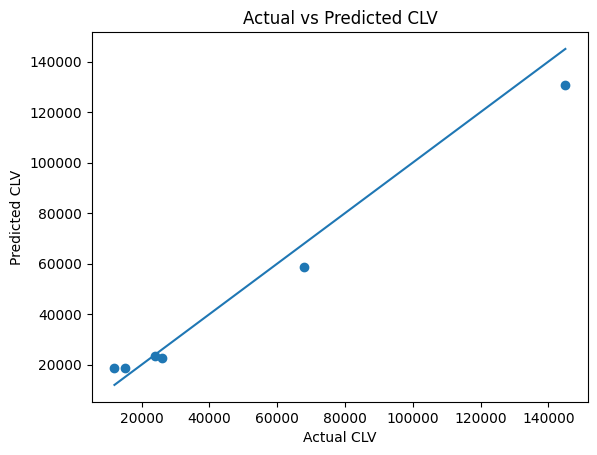

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df=pd.read_csv("clv_dataset.csv")


x=df[
    ["recency_days", "frequency", "avg_order_value", "tenure_months"]
]
y=df["customer_lifetime_value"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    random_state=42
)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

print("\nFeature Importance:\n",importance)

plt.Figure()
plt.scatter(y_test,y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)

plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted CLV")
plt.show()